Projet n°9 : Paradoxe des anniversaires

---

# Paradoxe des anniversaires : Probabilités, simulations et cryptographie



## 1. Introduction

Le paradoxe des anniversaires est un problème classique de probabilité qui montre que notre intuition peut être trompée. Il pose la question suivante :\
**Dans un groupe de personnes, quelle est la probabilité que deux d’entre elles partagent le même anniversaire ?**


Nous allons d’abord analyser ce paradoxe mathématiquement afin de comprendre pourquoi la probabilité de coïncidence augmente si vite avec la taille du groupe.\
Ensuite, nous le simulerons en Python pour visualiser concrètement les résultats et comparer théorie et pratique.\
Enfin, nous verrons comment ce principe s’applique en cryptographie, notamment dans l’étude des collisions de fonctions de hachage.


---

## 2. Modélisation mathématique

Nous allons calculer la probabilité qu’aucune collision d’anniversaire n’ait lieu dans un groupe de `n` personnes.

L’idée est de calculer la probabilité qu’aucune collision d’anniversaire n’apparaisse dans un groupe de n personnes.

</br>

* La première personne peut choisir librement parmi les 365 jours :\
**probabilité = 1.**

</br>

* La deuxième doit éviter le jour déjà pris soit :\
**364**\
**───**\
**365** 

</br>

* La troisième doit éviter deux jours soit :\
**363**\
**───**\
**365** 

</br>

* Et ainsi de suite, jusqu’à la 𝑛-ième personne.

</br>

La formule est donc :

$$ P(n) = \prod_{k=0}^{n-1} \left(1 - \frac{k}{365} \right) $$

ou alors en image : 

![alt text](https://raw.githubusercontent.com/Antokkk7/Jupyter-Paradoxe-des-anniversaires/09d6106f6c7d4c37bbed96f89ec28b344059f3f2/modelAnnivMath.jpg "mma")\
*sources : BibM@th, mathix.org & wikipedia*

</br>

La probabilité qu’il y ait **_au moins une collision_** est donc :


**1 - P(n)**


In [1]:
def prob_no_collision(n, days=365):
    prob = 1.0
    for k in range(n):
        prob *= (1 - k / days)
    return prob

def prob_at_least_one_collision(n, days=365):
    return 1 - prob_no_collision(n, days)

---

## 3. Visualisation de la probabilité

Pour mieux comprendre le paradoxe, nous allons représenter graphiquement l'évolution de la probabilité (tracer la courbe de la probabilité) qu’au moins deux personnes partagent un anniversaire en fonction de la taille du groupe.


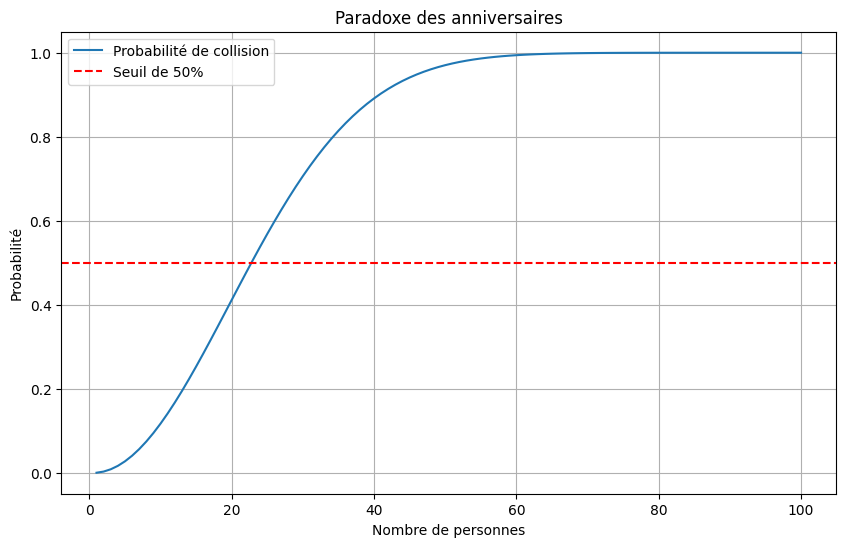

In [2]:
import matplotlib.pyplot as plt

group_sizes = range(1, 101)
probabilities = [prob_at_least_one_collision(n) for n in group_sizes]

plt.figure(figsize=(10, 6))
plt.plot(group_sizes, probabilities, label="Probabilité de collision")
plt.axhline(0.5, color='red', linestyle='--', label="Seuil de 50%")
plt.xlabel("Nombre de personnes")
plt.ylabel("Probabilité")
plt.title("Paradoxe des anniversaires")
plt.legend()
plt.grid(True)
plt.show()


Ce graphique met en évidence :

* 1] Une croissance non linéaire de la probabilité.

* 2] Le seuil critique autour de 23 personnes où la probabilité dépasse 50 %.

* 3] Une probabilité proche de 1 dès que le groupe atteint une soixantaine de personnes.

Ce graphique nous montre donc parfaitement le caractère contre-intuitif du paradoxe :
</br> 
*il ne faut pas un groupe immense pour que les chances de coïncidence deviennent très élevées.*

---

## 4. Simulation empirique

Nous allons maintenant simuler des groupes de personnes avec des anniversaires aléatoires et estimer la probabilité qu’au moins deux partagent le même jour.\
</br>
**Principe de la simulation :**
</br>
* 1] On génère aléatoirement un anniversaire pour chaque personne du groupe.

* 2] Si deux personnes obtiennent le même jour, on considère qu’il y a une collision.

En répétant cette expérience un grand nombre de fois (par exemple ici 10 000 essais), on peut estimer la probabilité d’une collision.

In [3]:
import random

def simulate_collision(n, days=365):
    birthdays = set()
    for _ in range(n):
        bday = random.randint(1, days)
        if bday in birthdays:
            return True
        birthdays.add(bday)
    return False

def estimate_collision_probability(n, trials=10000):
    collisions = sum(simulate_collision(n) for _ in range(trials))
    return collisions / trials


Les résultats obtenus par simulation confirment la modélisation mathématique :\
</br>
La probabilité d’une collision augmente avec la taille du groupe et atteint environ 50 % dès 23 personnes.\
</br>
Cette simulation démontre le paradoxe des anniversaires et confirme que même sans calculs complexes, une simple simulation aléatoire permet de mettre en évidence ce phénomène contre-intuitif.

---

## 5. Application aux fonctions de hachage

Le paradoxe des anniversaires est utilisé pour estimer la probabilité de collision dans les fonctions de hachage. Pour un hash de `n` bits, une collision devient probable après environ \( 2^{n/2} \) essais.

Nous allons illustrer cela avec une fonction de hachage comme SHA-256 :
</br>
SHA-256 produit des empreintes de 256 bits.

* L’espace total est donc de [***2 puissance 256***] valeurs possibles.

* Mais une collision devient probable après environ [***2 puissance 128***] essais, ce qui est bien plus petit que [***2 puissance 256***].\
(*même si cela reste un gros nombre...*)


In [4]:
import hashlib

def random_string(length=10):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    return ''.join(random.choice(letters) for _ in range(length))

def hash_sha256(s):
    return hashlib.sha256(s.encode()).hexdigest()

def find_hash_collision(trials=100000):
    seen = set()
    for _ in range(trials):
        s = random_string()
        h = hash_sha256(s)
        if h in seen:
            return True
        seen.add(h)
    return False


---

## 6. Conclusion

Le paradoxe des anniversaires montre que les collisions sont plus probables qu’on ne le pense.\
En cryptographie, cela souligne l’importance de la taille des fonctions de hachage suffisamment longues pour éviter les collisions.

Nous avons vu comment la théorie, la simulation et la sécurité informatique sont liées par ce paradoxe, dans un groupe de seulement 23 personnes, la probabilité qu’au moins deux partagent le même anniversaire dépasse déjà 50 % !

De la même manière, pour une fonction de hachage de 
𝑛 bits, nous n'avons pas besoin de ***2𝑛 essais*** pour espérer une collision, mais environ ***√2𝑛 = 2𝑛/2 essais***.\
Et dans un contexte malveillant, c’est ce que l'on peut appeller une attaque par anniversaire qui consiste donc à ne pas explorer toutes les 2𝑛 possibilités pour trouver une série de caractères.

Dans le cas des mots de passe, si une fonction de hachage faible ou trop courte est utilisée, un attaquant peut exploiter ce principe pour augmenter ses chances de trouver deux valeurs différentes produisant le même hash et compromettant ainsi l’intégrité du système. 

L’attaque par anniversaire rappelle donc que la robustesse des algorithmes de hachage n'est pas à ignorer et l'utilisation de mots de passes à 128~256 bits comme par exemple :\
***[FEC4B0EB4484B7ECE0A7126662DC4A3E4EB239124645F9A25DDFA5B7DB808290]***\
qui est un mot de passe bien plus sûr que :\
***[JP16031996]***\
... est impératif pour éviter des vols de données.
